In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime as dt
import datetime
from datetime import timedelta  
import timeboard as tb # turnos 

# para tratar de poner espanol
from datetime import date, datetime, time
from babel.dates import format_date, format_datetime, format_time, format_timedelta, Locale
import locale                                    # para tratar de poner espanol
#locale = Locale('es', 'CL')
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')  

import os
import runpy
from pyexcel_ods import get_data
from matplotlib_venn import venn3
from matplotlib_venn import venn2, venn2_circles
import math

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline


#otro graficador
import seaborn as sns

#stats

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/home/egidio/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# importar funciones locales

In [2]:
#listo los archivos
scripts = []
for dirname, dirnames, filenames in os.walk('/home/egidio/Dropbox/Compucosas/programas py'):
    for filename in filenames:
        scripts.append(os.path.join(dirname, filename))

scripts

# los cargo
for script in scripts:
    if script[-3:] == '.py':
        exec(open(str(script)).read())


['/home/egidio/Dropbox/Compucosas/programas py/lector_ODF.py',
 '/home/egidio/Dropbox/Compucosas/programas py/como importar',
 '/home/egidio/Dropbox/Compucosas/programas py/descripcion_univariada.py',
 '/home/egidio/Dropbox/Compucosas/programas py/características_operativas_de_test.py',
 '/home/egidio/Dropbox/Compucosas/programas py/percentiles.py',
 '/home/egidio/Dropbox/Compucosas/programas py/tabala_frecuencias.py',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/percentiles.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/lector_ODF.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/descripcion_univariada.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/características_operativas_de_test.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/tabala_frecuencias.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/funciones_locales.cpython-36.pyc']

# importo BD 

In [3]:
os.getcwd()

'/home/egidio/Dropbox/Trabajos científicos/Conocimiento 131'

In [4]:
db3 = pd.read_excel('./BDs/Tabulación 3.xlsx')

In [23]:
BD = db3

In [24]:
BD.columns

Index(['Ciudad', 'Edad', 'Sexo', 'Niv. Educación', 'Nacionalidad',
       'Número SAMU', 'Conocimiento', 'Pertinencia', 'Difusión'],
      dtype='object')

In [25]:
for cols in BD.columns.unique():
    print (cols)
    BD[cols].value_counts().head()

Ciudad


Quillota        100
Quintero        100
La Ligua        100
Viña del mar    100
Name: Ciudad, dtype: int64

Edad


18    25
15    20
17    16
31    16
22    15
Name: Edad, dtype: int64

Sexo


mujer     215
hombre    184
otro        1
Name: Sexo, dtype: int64

Niv. Educación


media            208
universitario     70
técnico           59
básica            57
sin estudios       6
Name: Niv. Educación, dtype: int64

Nacionalidad


chilena       377
extranjero     23
Name: Nacionalidad, dtype: int64

Número SAMU


131    206
132     83
911     75
133     36
Name: Número SAMU, dtype: int64

Conocimiento


3    274
2    103
1     17
0      6
Name: Conocimiento, dtype: int64

Pertinencia


7    219
6     88
5     41
4     22
3     19
Name: Pertinencia, dtype: int64

Difusión


a    196
d     93
c     71
b     40
Name: Difusión, dtype: int64

In [27]:
BD['Niv. Educación'] = BD['Niv. Educación'].replace(
    {'sin estudios': 'Sin estudios',
     'básica': 'Básica',
     'media': 'Media',
     'técnico': 'Técnico',
     'universitario': 'Universitario'
    })

BD['Niv. Educación'] = pd.Categorical(BD['Niv. Educación'], 
                                      ordered= True,
                                      categories= ['Sin estudios', 'Básica',
                                                   'Media', 'Técnico', 'Universitario']
                                     )
BD['Niv. Educación'].head()

# Análisis

In [41]:
BD['Número SAMU'] = pd.Series(BD['Número SAMU'])
tab_frec(BD['Número SAMU'])

,n,%
Número SAMU,,
131,206,51.50
132,83,20.75
911,75,18.75
133,36,9.00
Total,400,100.00


## Descripción de la muestra

In [42]:
BD.Edad.describe()
tab_frec(BD.Sexo)
tab_frec(BD['Niv. Educación'])
tab_frec(BD['Nacionalidad'])

count    400.000000
mean      32.697500
std       17.179751
min        8.000000
25%       18.000000
50%       27.000000
75%       45.000000
max       85.000000
Name: Edad, dtype: float64

,n,%
Sexo,,
mujer,215,53.75
hombre,184,46.00
otro,1,0.25
Total,400,100.00


,n,%
Niv. Educación,,
Media,208,52.00
Universitario,70,17.50
Técnico,59,14.75
Básica,57,14.25
Sin estudios,6,1.50
Total,400,100.00


,n,%
Nacionalidad,,
chilena,377,94.25
extranjero,23,5.75
Total,400,100.00


Text(0.5, 1.0, 'Histograma de Edad')

Text(0.5, 0, 'Edad')

Text(0, 0.5, 'Frecuencia absoluta')

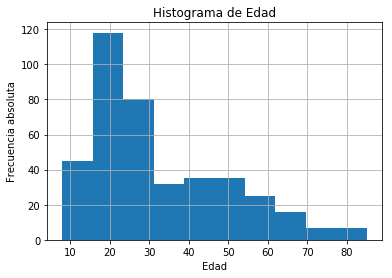

In [30]:
BD.Edad.hist()
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia absoluta')
plt.savefig('./Resultados/fig_histogramaedad.png', dpi= 100)

Text(0.5, 1.0, 'Edad según nivel educacional')

Text(0.5, 0, 'Nivel Educacional')

Text(0, 0.5, 'Edad')

Text(0.5, 0.98, '')

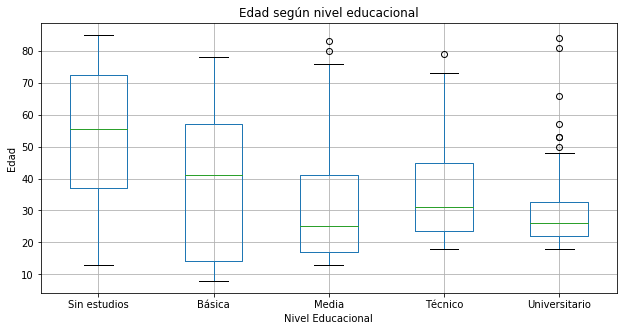

In [31]:
BD.boxplot(column=['Edad'], by = 'Niv. Educación',
           #positions=['Sin Estudios', 'Básica', 'Media', 'Técnico', 'Universitario'],
           figsize=(10,5))
plt.title('Edad según nivel educacional')
plt.xlabel('Nivel Educacional')
plt.ylabel('Edad')
plt.suptitle('')
plt.savefig('./Resultados/fig_edadxeducacion.png', dpi= 100)

Index(['Ciudad', 'Edad', 'Sexo', 'Niv. Educación', 'Nacionalidad',
       'Número SAMU', 'Conocimiento', 'Pertinencia', 'Difusión'],
      dtype='object')

count    400.000000
mean       2.612500
std        0.642944
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Conocimiento, dtype: float64

count    400.000000
mean       6.067500
std        1.370269
min        0.000000
25%        6.000000
50%        7.000000
75%        7.000000
max        7.000000
Name: Pertinencia, dtype: float64

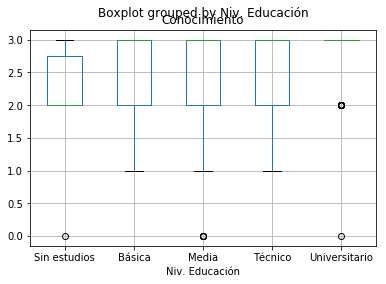

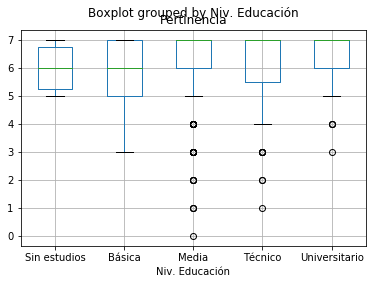

In [37]:
BD.columns
BD.Conocimiento.describe()
BD.Pertinencia.describe()
BD.boxplot(column=['Conocimiento'], by = 'Niv. Educación')
BD.boxplot(column=['Pertinencia'], by = 'Niv. Educación')


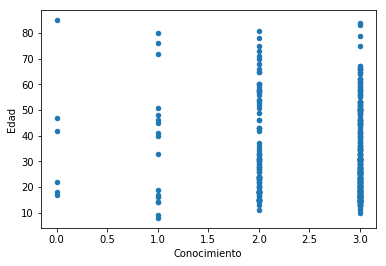

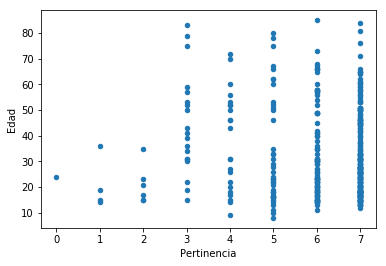

In [43]:
BD.plot(kind='scatter', x='Conocimiento', y='Edad')
BD.plot(kind='scatter', x='Pertinencia', y='Edad')

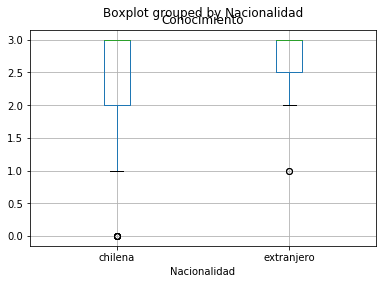

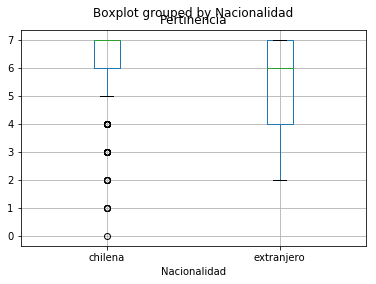

In [44]:
BD.boxplot(column=['Conocimiento'], by = 'Nacionalidad')
BD.boxplot(column=['Pertinencia'], by = 'Nacionalidad')

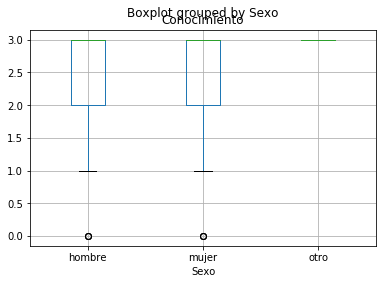

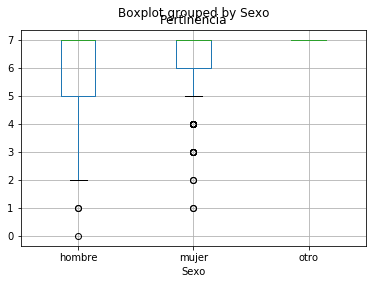

In [45]:
BD.boxplot(column=['Conocimiento'], by = 'Sexo')
BD.boxplot(column=['Pertinencia'], by = 'Sexo')

Text(0.5, 1.0, '')

Text(0.5, 0.98, '')

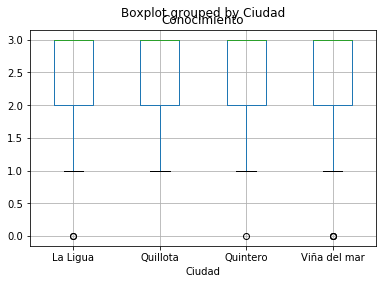

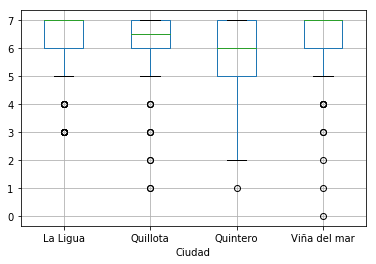

In [49]:
BD.boxplot(column=['Conocimiento'], by = 'Ciudad')
BD.boxplot(column=['Pertinencia'], by = 'Ciudad')
plt.title('')
plt.suptitle('')
